In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AffinityPropagation, KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/shop_result.csv')
data.head()

,deviceid,0,1,2,3,4,5,6,7
0,0013E654B9E0547D4A4685686053C1A018978520,0.277420,-0.832287,-0.140695,0.504370,0.242613,-0.273086,0.261683,0.517427
1,002306CBFF597095063B883266950B16F7F3EC92,0.291558,-0.828898,-0.115418,0.490176,0.223081,-0.242614,0.342937,0.455824
2,002331DB8D89FAAA6D48F849B4BE2A0AD2030B78,0.287914,-0.830949,-0.140279,0.498760,0.238941,-0.259384,0.280759,0.494729
3,003EF4A46B0F729DC7EDA8E99F005AA7403B518D,0.246279,-0.815864,0.117654,0.447704,0.232426,-0.176563,0.693761,0.225964
4,0058B0BE88D4BBAE132DD6EE2027EACB421A3C57,0.283329,-0.831389,-0.139497,0.500377,0.253492,-0.275048,0.276189,0.494341


In [ ]:
id = data.pop('deviceid')
data.head()

,0,1,2,3,4,5,6,7
0,0.277420,-0.832287,-0.140695,0.504370,0.242613,-0.273086,0.261683,0.517427
1,0.291558,-0.828898,-0.115418,0.490176,0.223081,-0.242614,0.342937,0.455824
2,0.287914,-0.830949,-0.140279,0.498760,0.238941,-0.259384,0.280759,0.494729
3,0.246279,-0.815864,0.117654,0.447704,0.232426,-0.176563,0.693761,0.225964
4,0.283329,-0.831389,-0.139497,0.500377,0.253492,-0.275048,0.276189,0.494341


In [ ]:
sc = StandardScaler()
data_scale = sc.fit_transform(data)
data_scale

array([[ 0.60876055, -0.57153701, -1.0902633 , ..., -0.04234851,
        -1.1291844 ,  0.91805087],
       [ 0.83236382, -0.43331789, -0.89199887, ...,  0.22364489,
        -0.69836317,  0.5296266 ],
       [ 0.77473656, -0.5169469 , -1.087     , ...,  0.0772554 ,
        -1.02803927,  0.77493343],
       ...,
       [-2.45830262, -0.52476562,  1.22603758, ..., -1.69444783,
         0.43619798,  0.35700418],
       [-0.14777871, -0.3170092 , -0.1364315 , ..., -0.55343127,
        -0.2324412 ,  0.25687787],
       [ 0.54083543, -0.22748395, -0.49675196, ...,  0.08295092,
        -0.20111547,  0.33187038]])

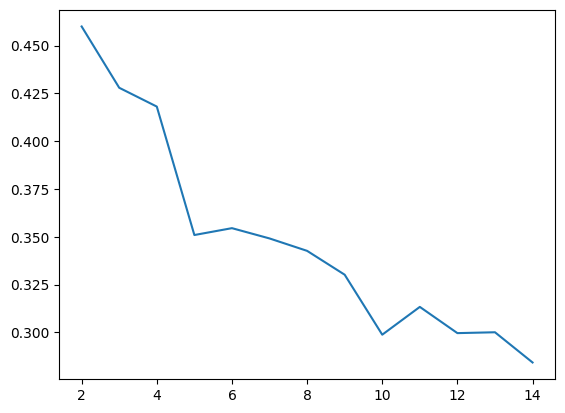

In [ ]:
silhouette_avg = []
for i in range(2,15):
    kmeans_fit = KMeans(n_clusters = i, n_init = 'auto', random_state = 1126).fit(data_scale)
    silhouette_avg.append(silhouette_score(data_scale, kmeans_fit.labels_))
plt.plot(range(2,15), silhouette_avg)

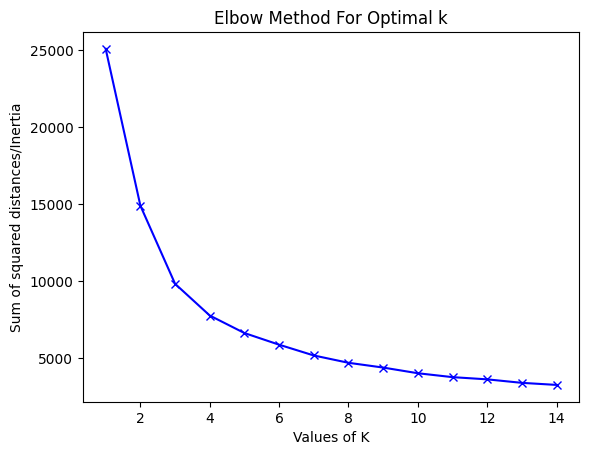

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for num_clusters in K :
 kmeans = KMeans(n_clusters = num_clusters, n_init = 'auto', random_state = 1126)
 kmeans.fit(data_scale)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 11, init = 'k-means++', n_init = 1, random_state = 1126)
kmeans.fit(data_scale)

KMeans(n_clusters=11, n_init=1, random_state=1126)

In [ ]:
s = silhouette_score(data_scale, kmeans.labels_, metric="euclidean")
print(s)

0.31337982010045673


In [ ]:
s = calinski_harabasz_score(data_scale, kmeans.labels_)
print(s)

1777.2041939381145


In [ ]:
DB = davies_bouldin_score(data_scale, kmeans.labels_)
print(DB)

0.9854195849435641


In [ ]:
print(kmeans.cluster_centers_)

[[ 0.59895953 -0.48396031 -0.82680845  0.51571466 -0.01809665  0.03686217
  -0.79160669  0.65408369]
 [-0.17743697  0.33242899  0.71666676 -0.5810636  -0.19884137  0.15215485
   0.8608041  -0.68899097]
 [-0.04348915  2.42167157  1.27144925 -2.41314276 -1.96920134  1.82935014
   1.58214271 -2.17228497]
 [-1.61353996 -0.27718861  0.85709968  0.54722236  1.42677148 -1.34001937
   0.35871694  0.13942948]]


In [ ]:
af = AffinityPropagation(random_state = 1126, damping = 0.65, preference = -300)
af.fit(data_scale)

AffinityPropagation(damping=0.65, preference=-300, random_state=1126)

In [ ]:
np.min(af.affinity_matrix_)

-338.42584452440246

In [ ]:
centers = af.cluster_centers_indices_
centers.shape

(11,)

In [ ]:
print(data.iloc[centers, :])

             0         1         2         3         4         5         6  \
29    0.118887 -0.836346  0.080199  0.517307  0.481786 -0.430449  0.432662   
366   0.211724 -0.824769  0.050340  0.486309  0.316071 -0.315785  0.521571   
515   0.233659 -0.832253 -0.062516  0.504482  0.306429 -0.322912  0.338955   
581   0.181267 -0.794576  0.164690  0.434510  0.243962 -0.257401  0.768468   
629   0.250124 -0.720032  0.156840  0.356508 -0.240699  0.136218  0.767150   
1512  0.069199 -0.820484  0.215390  0.487144  0.587461 -0.474659  0.712403   
1621  0.295095 -0.831259 -0.154394  0.499193  0.231225 -0.250259  0.264563   
1908  0.283297 -0.825899 -0.073960  0.481697  0.198470 -0.225498  0.420228   
1991  0.184593 -0.812034  0.144235  0.466158  0.320616 -0.337146  0.684256   
2400  0.222878 -0.775500  0.151872  0.401536  0.014125 -0.083343  0.779414   
2423  0.271953 -0.814206  0.038402  0.455793  0.117883 -0.165000  0.607205   

             7  
29    0.499549  
366   0.387563  
515   0.4887

In [ ]:
s = silhouette_score(data_scale, af.labels_, metric="euclidean")
print(s)

0.292082262919367


In [ ]:
s = calinski_harabasz_score(data_scale, af.labels_)
print(s)

1712.75995929459


In [ ]:
DB = davies_bouldin_score(data_scale, af.labels_)
print(DB)

1.0544329142200737


In [ ]:
ds = DBSCAN(eps = 0.05, min_samples = 30)
ds.fit(data_scale)

DBSCAN(eps=0.05, min_samples=30)

In [ ]:
centers = ds.core_sample_indices_
centers.shape

(58,)